In [1]:
from deepbench.astro_object import SpiralGalaxyObject
from deepbench.astro_object import GalaxyObject
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
dataset_size = 10000
image_size = 100

In [3]:
spirals = np.zeros((dataset_size // 2, image_size, image_size))
noisy_spirals = np.zeros((dataset_size // 2, image_size, image_size))
metadata_columns = ['winding_number', 'noise_level', 'spiral_pitch', 'center_x', 'center_y']
spiral_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    winding_number = np.random.randint(2, 9)
    noise_level = np.random.uniform(0.01, .05)
    spiral_pitch = np.random.randint(1, 4)
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {
        'winding_number': winding_number,
        'noise_level': noise_level,
        'spiral_pitch': spiral_pitch,
        'center_x': center_x,
        'center_y': center_y
    }
    spiral_metadata = spiral_metadata.append(metadata, ignore_index=True)


    spiral_galaxy = SpiralGalaxyObject(image_dimensions=(image_size, image_size), 
                                        winding_number=winding_number,
                                        noise_level=0,
                                        spiral_pitch=spiral_pitch)
    
    noisy_spiral = SpiralGalaxyObject(image_dimensions=(image_size, image_size), 
                                        winding_number=winding_number,
                                        noise_level=noise_level,
                                        spiral_pitch=spiral_pitch)
    
    spiral_img = spiral_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = noisy_spiral.create_object(center_x = center_x, center_y = center_y)
    spirals[i] = spiral_img
    noisy_spirals[i] = noisy_img
    

100%|██████████| 5000/5000 [00:09<00:00, 545.13it/s]


winding_number     3.000000
noise_level        0.022435
spiral_pitch       1.000000
center_x          89.000000
center_y          22.000000
Name: 990, dtype: float64


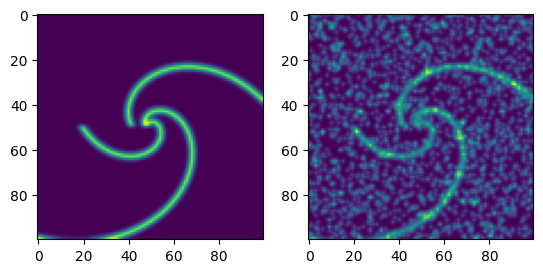

In [4]:
idx = np.random.randint(0, 1000)
print(spiral_metadata.iloc[idx])

fig, ax = plt.subplots(1, 2)

ax[0].imshow(spirals[idx])
ax[1].imshow(noisy_spirals[idx])



In [5]:
blobs = np.zeros((dataset_size // 2, image_size, image_size))
noisy_blobs = np.zeros((dataset_size // 2, image_size, image_size))

metadata_columns = ['radius', 'n', 'ellipse', 'theta', 'noise_level', 'center_x', 'center_y']
blob_metadata = pd.DataFrame(columns=metadata_columns)

for i in tqdm(range(5000)):

    radius = np.random.randint(10, 100)
    n = np.random.uniform(0.5, 1.5)
    ellipse = np.random.uniform(0.1,0.9)
    theta = np.random.uniform(-1.5, 1.5)
    noise_level = np.random.uniform(0.01, 0.1)
    center_x = np.random.randint(0, image_size)
    center_y = np.random.randint(0, image_size)
    
    metadata = {'radius': radius,
                'n': n,
                'ellipse': ellipse,
                'theta': theta,
                'noise_level': noise_level,
                'center_x': center_x,
                'center_y': center_y}
    blob_metadata = spiral_metadata.append(metadata, ignore_index=True)

    blob_galaxy = GalaxyObject(image_dimensions=(100,100), 
                                        noise_level=0.0,
                                        n = n,
                                        ellipse=ellipse,
                                        theta = theta,
                                        radius=radius)
    
    noisy_blob_galaxy = GalaxyObject(image_dimensions=(100,100),
                                        noise_level=noise_level,
                                        n = n,
                                        ellipse=ellipse,
                                        theta = theta,
                                        radius=radius)
    
    img = blob_galaxy.create_object(center_x = center_x, center_y = center_y)
    noisy_img = noisy_blob_galaxy.create_object(center_x = center_x, center_y = center_y)
    blobs[i] = img
    noisy_blobs[i] = noisy_img

100%|██████████| 5000/5000 [00:10<00:00, 495.70it/s]


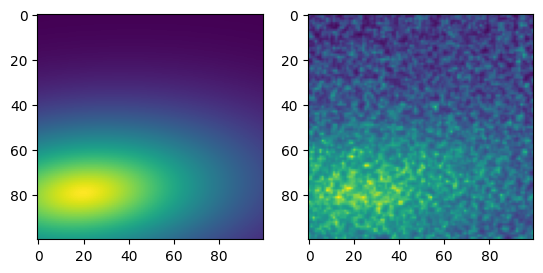

In [6]:
idx = np.random.randint(0, 5000)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(blobs[idx])
ax[1].imshow(noisy_blobs[idx])



In [7]:
data = np.concatenate((blobs, spirals), axis=0)
labels = np.concatenate((np.zeros(5000), np.ones(5000)))
noisy_data = np.concatenate((noisy_blobs, noisy_spirals), axis=0)
noisy_labels = np.concatenate((np.zeros(5000), np.ones(5000)))

In [8]:
path = '/Users/snehpandya/Projects/GCNN_DA/data/toy_dataset_astro'
np.save(f'{path}/astro_data.npy', data)
np.save(f'{path}/astro_labels.npy', labels)
np.save(f'{path}/noisy_astro_data.npy', noisy_data)
np.save(f'{path}/noisy_astro_labels.npy', noisy_labels)
spiral_metadata.to_csv(f'{path}/spiral_metadata.csv')
blob_metadata.to_csv(f'{path}/blob_metadata.csv')